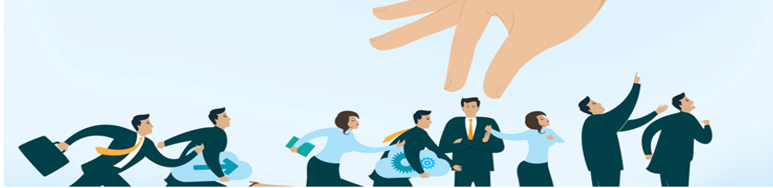

# **LEAD SCORING CASE STUDY**


## **Problem Statement**

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.



---



---



## **Goals of the Case Study**

Build a **logistic regression model** to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential ls. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.



---



---





## **Approach**

We will first analyse the dataset and will look for any missing or duplicate values in data. We will then clean the data if found any issue. After that will do Exploratory Data Analysis to find any hidden pattern and will then prepare the data for data modelling
We will use statsmodel.api with Binomial families. We will check p-values of the features and also check Variance Inflation Factor amongst features. We will ignore the features with high VIF and will create a list of features using p-value<0.05 and low VIF. We will also use RFE for feature selection
Finally, we will use Gain and Lift charts to recommend how much percentage of top leads should be targeted for lead conversion using 80% ballpark conversion rate


---


---



## **Required Libraries**

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler






%matplotlib inline
warnings.filterwarnings('ignore') #Supressing warnings
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)
pd.set_option("display.max_colwidth",5000)
plt.style.use("ggplot")

# **DATA USED FOR ANALYSIS**

*   Leads.csv as  "***ls***"



---


---

In [2]:
# Reading file Leads.csv

ls=pd.read_csv("Leads.csv")
ls.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#checking total rows and cols in dataset
ls.shape

(9240, 37)

This dataset has:
- 9240 rows,
- 37 columns

In [4]:
#basic data check
ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# printing statistical summary of th data
ls.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
 #check for duplicates
sum(ls.duplicated(subset = 'Prospect ID')) == 0

True

**No duplicate values in Prospect ID**

In [7]:
#check for duplicates
sum(ls.duplicated(subset = 'Lead Number')) == 0

True

**No duplicate values in Lead Number**

Clearly Prospect ID & Lead Number are two variables that are just indicative of the ID number of the Contacted People & can be dropped.

# **DATA CLEANING AND TREATMENT:**

## **Exploratory Data Analysis**

In [8]:
lead_copy=ls.copy()

In [9]:
lead_copy[:5]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
#dropping Lead Number and Prospect ID since they have all unique values

ls.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [11]:
#Converting 'Select' values to NaN.

ls = ls.replace('Select', np.nan)

In [12]:
#checking percentage of null values in each column

round(100*(ls.isnull().sum()/len(ls.index)), 2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Call                                       0.00
Converted 

In [13]:
#dropping cols with more than 45% missing values

cols=ls.columns

for i in cols:
    if((100*(ls[i].isnull().sum()/len(ls.index))) >= 45):
        ls.drop(i, 1, inplace = True)

In [14]:
#checking null values percentage after dropping 

round(100*(ls.isnull().sum()/len(ls.index)), 2).sort_values(ascending = False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Last Notable Activity                             0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Search                                            0.00
A free copy of Mastering The Interview            0.00
Magazine                                          0.00
Newspaper 

#### **Checking Data Imbalance**

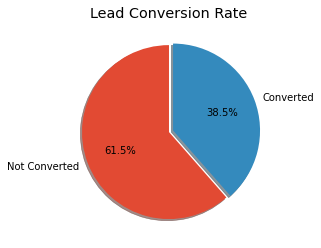

In [15]:
#Adding pie chart to visualize Data imbalancing
plt.pie( ls.Converted.value_counts(normalize = True)*100, explode = (0,0.05) , autopct='%1.1f%%',
        shadow=True, startangle=90 , labels = [ 'Not Converted', 'Converted'])
#Adding and formatting title
plt.title('Lead Conversion Rate')
plt.show()


- 38.5 % Leads are converted to Paying Customers.

## **Categorical Attributes Analysis:**

>> ### **Country**

In [16]:
#checking value counts of Country column

ls['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
South Africa               4
Germany                    4
Kuwait                     4
Nigeria                    4
Canada                     4
Sweden                     3
Uganda                     2
Ghana                      2
Italy                      2
Netherlands                2
Belgium                    2
Philippines                2
China                      2
Asia/Pacific Region        2
Bangladesh                 2
Kenya                      1
Indonesia                  1
Liberia                    1
Switzerland                1
Denmark                    1
Vietnam       

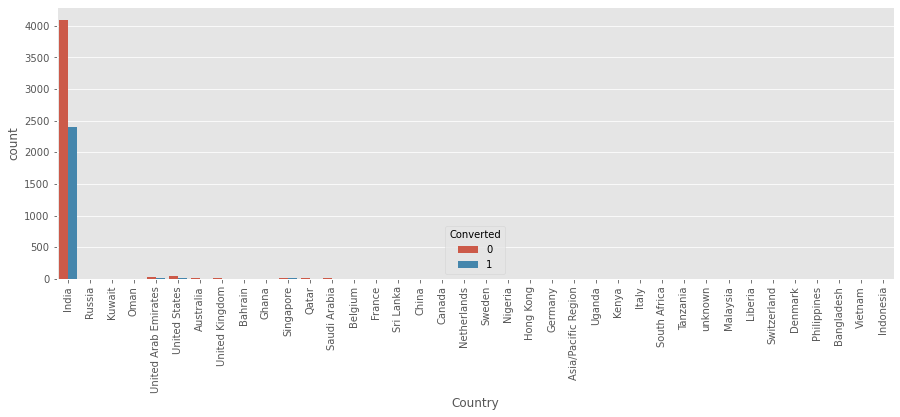

In [17]:
#Plotting countplot to visualize country column
plt.figure(figsize=(15,5))
s1=sns.countplot(ls.Country, hue=ls.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- Since India is the most common occurence among the non-missing values we can impute all missing values with India

In [18]:
#  imputing all missing values with India

ls['Country'] = ls['Country'].replace(np.nan,'India')


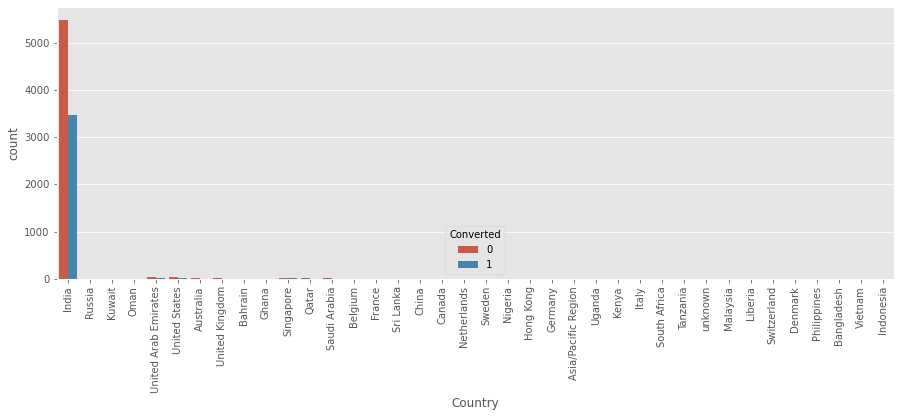

In [19]:
#plotting spread of Country columnn after replacing NaN values

plt.figure(figsize=(15,5))
s1=sns.countplot(ls.Country, hue=ls.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

**As we can see the Number of Values for India are quite high (nearly 97% of the Data), this column can be dropped**

In [20]:
#creating a list of columns to be droppped

cols_to_drop=['Country']

>> ### **City**

In [21]:
#checking value counts of "City" column

ls['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [22]:
ls['City'] = ls['City'].replace(np.nan,'Other Cities')

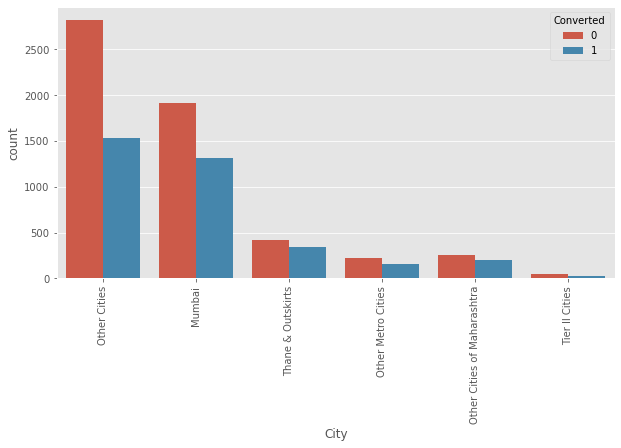

In [23]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(ls.City, hue=ls.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

>> ### **Percentage of Lead Conversion** 

In [24]:
#Creating crosstab to find out percentage
crosstab_df = pd.crosstab(ls['Converted'],
                  ls['City']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

City,Mumbai,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Tier II Cities
Converted,,,,,,
0,59.37,64.8,56.02,59.21,55.05,66.22
1,40.63,35.2,43.98,40.79,44.95,33.78


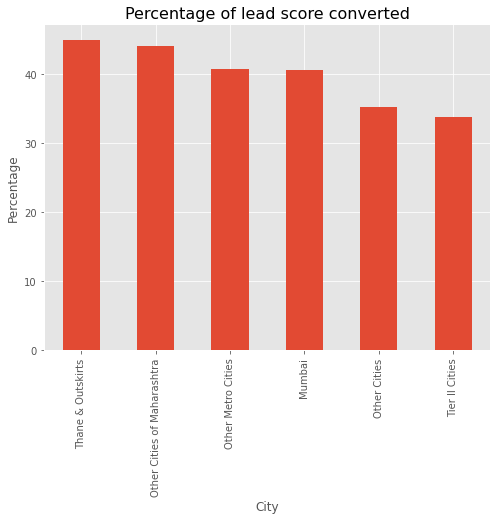

In [25]:
plt.figure( figsize = (8,6))
#plotting bar chart to visualize better
crosstab_df.iloc[1].sort_values(ascending = False).plot(kind = 'bar')

#Adding and formatting title and labels
plt.title('Percentage of lead score converted',fontsize = 16)
plt.xlabel('City')
plt.ylabel('Percentage')
plt.show()

**Inferences** :
- There is no notable difference

>> ### **Specialization**

In [26]:
#checking value counts of Specialization column

ls['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [27]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are a students 
# and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

ls['Specialization'] = ls['Specialization'].replace(np.nan, 'Not Specified')

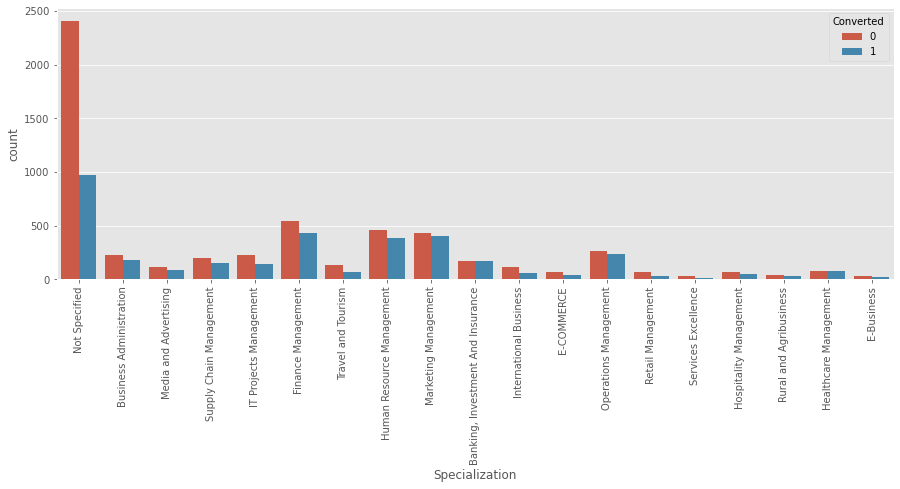

In [28]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(ls.Specialization, hue=ls.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- We see that specialization with **Management** in them have higher number of ls as well as ls converted.
So this is definitely a significant variable and should not be dropped.

In [29]:
#combining Management Specializations because they show similar trends

ls['Specialization'] = ls['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

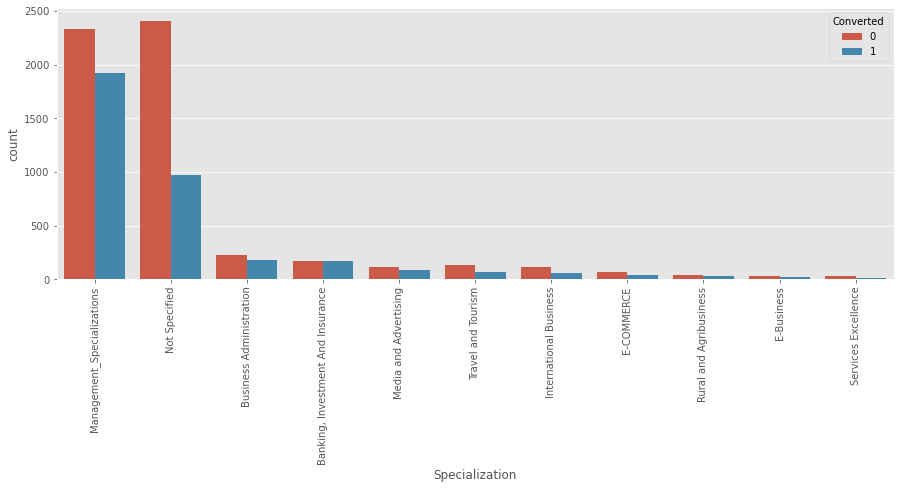

In [30]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot( ls.Specialization, hue = ls.Converted ,order = ls.Specialization.value_counts().index)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

>> ### **Percentage of Lead Conversion** 

In [31]:
#Creating crosstab to find out percentage
crosstab_df = pd.crosstab(ls['Converted'],
                  ls['Specialization']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

Specialization,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,International Business,Management_Specializations,Media and Advertising,Not Specified,Rural and Agribusiness,Services Excellence,Travel and Tourism
Converted,,,,,,,,,,,
0,50.59,55.58,63.16,64.29,64.04,54.81,58.13,71.33,57.53,72.5,64.53
1,49.41,44.42,36.84,35.71,35.96,45.19,41.87,28.67,42.47,27.5,35.47


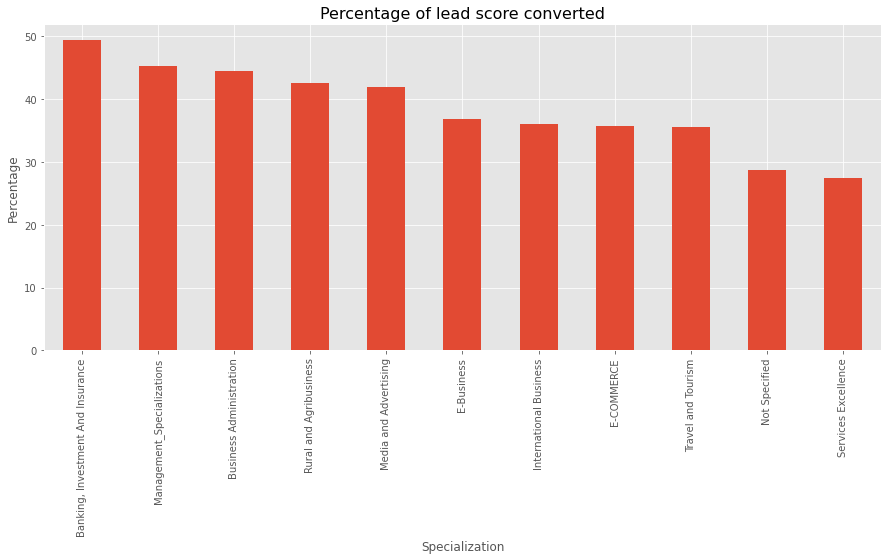

In [32]:
plt.figure( figsize = (15,6))
#plotting bar chart to visualize better
crosstab_df.iloc[1].sort_values(ascending = False).plot(kind = 'bar')

#Adding and formatting title and labels
plt.title('Percentage of lead score converted',fontsize = 16)
plt.xlabel('Specialization')
plt.ylabel('Percentage')
plt.show()

**Inferences** :
- Banking, Investment and Insurance, Management Specialization , Business Administration, Rural and Agribusiness  have higher conversion percentage as compared to others.
- Services Exellences have lowest conversion percentage.

>>  ### **What is your current occupation**

In [33]:
# What is your current occupation

ls['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [34]:
# imputing Nan values with mode "Unemployed"

ls['What is your current occupation'] = ls['What is your current occupation'].replace(np.nan, 'Unemployed')

In [35]:
#checking count of values again
ls['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

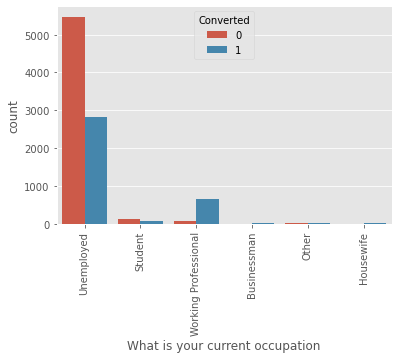

In [36]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(ls['What is your current occupation'], hue=ls.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- Working Professionals going for the course have high chances of joining it.
- Unemployed ls are the most in terms of Absolute numbers.

>> ### **Percentage of Lead Conversion** 

In [37]:
#Creating crosstab to find out percentage
crosstab_df = pd.crosstab(ls['Converted'],
                  ls['What is your current occupation']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

What is your current occupation,Businessman,Housewife,Other,Student,Unemployed,Working Professional
Converted,,,,,,
0,37.5,0.0,37.5,62.86,66.09,8.36
1,62.5,100.0,62.5,37.14,33.91,91.64


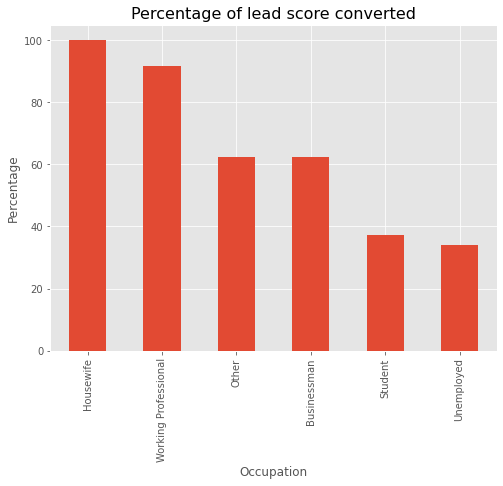

In [38]:
plt.figure( figsize = (8,6))
#plotting bar chart to visualize better
crosstab_df.iloc[1].sort_values(ascending = False).plot(kind = 'bar')

#Adding and formatting title and labels
plt.title('Percentage of lead score converted',fontsize = 16)
plt.xlabel('Occupation')
plt.ylabel('Percentage')
plt.show()

**Inferences** :
- Here we observe that, though **Housewife** have lowest frequency , but have 100% conversion rate. We should focus on this category.
- Working professionals have higher conversion frequency.

>>  ### **What matters most to you in choosing a course**

In [39]:
#checking value counts

ls['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [40]:
#replacing Nan values with Mode "Better Career Prospects"

ls['What matters most to you in choosing a course'] = ls['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

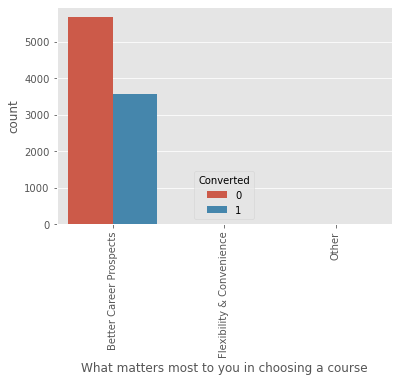

In [41]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(ls['What matters most to you in choosing a course'], hue=ls.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [42]:
#checking value counts of variable
ls['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

- Here again we have another Column that is worth Dropping. So we Append to the cols_to_drop List

In [43]:
#Here again we have another Column that is worth Dropping. So we Append to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

>> ### **Tags**

In [44]:
#checking value counts of Tag variable
ls['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [45]:
#replacing Nan values with "Not Specified"
ls['Tags'] = ls['Tags'].replace(np.nan,'Not Specified')

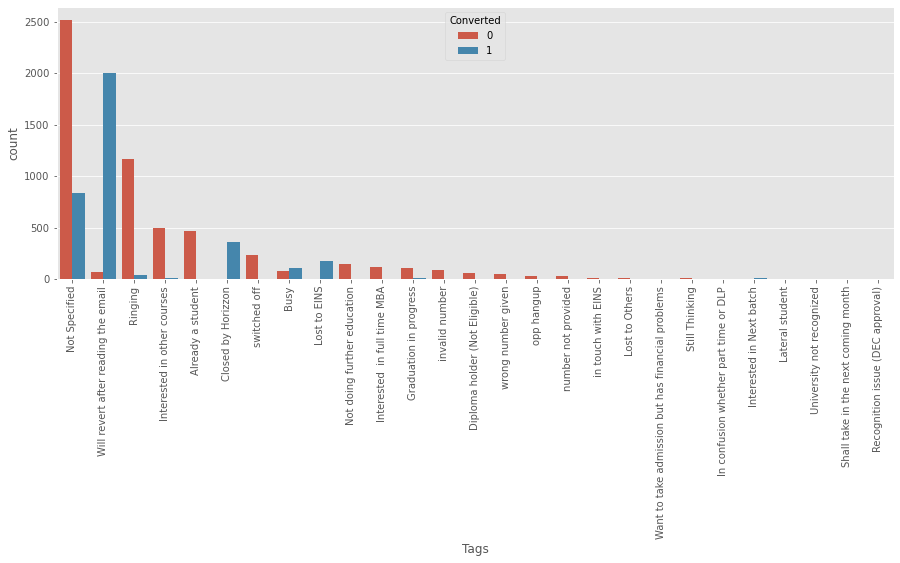

In [46]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(ls['Tags'], hue=ls.Converted, order = ls.Tags.value_counts().index)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [47]:
#replacing tags with low frequency with "Other Tags"

ls['Tags'] = ls['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

ls['Tags'] = ls['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

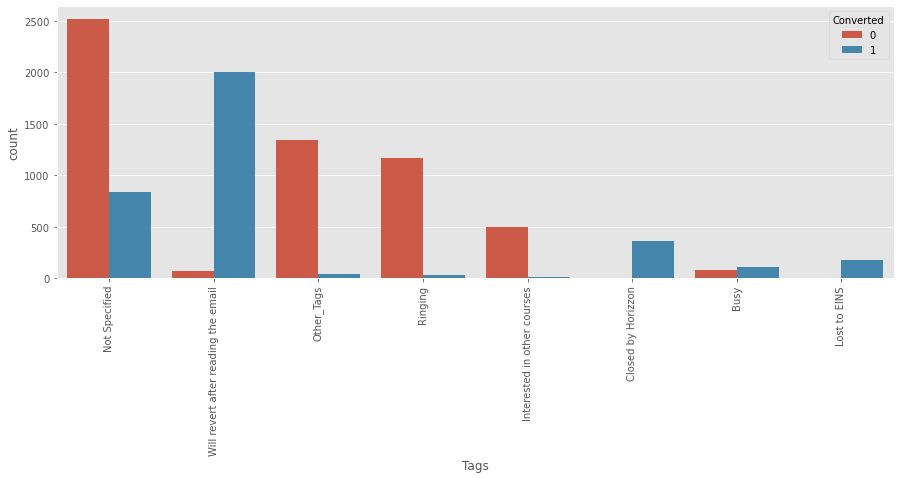

In [48]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(ls['Tags'], hue=ls.Converted, order = ls.Tags.value_counts().index)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show() 

In [49]:
#checking percentage of missing values

round(100*(ls.isnull().sum()/len(ls.index)), 2).sort_values(ascending = False)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Last Notable Activity                            0.00
A free copy of Mastering The Interview           0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
Total Time Spent on Website                      0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

>> ### **Percentage of Lead Conversion** 

In [50]:
#Creating crosstab to find out percentage
crosstab_df = pd.crosstab(ls['Converted'],
                  ls['Tags']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

Tags,Busy,Closed by Horizzon,Interested in other courses,Lost to EINS,Not Specified,Other_Tags,Ringing,Will revert after reading the email
Converted,,,,,,,,
0,43.55,0.56,97.47,2.29,75.07,97.17,97.17,3.14
1,56.45,99.44,2.53,97.71,24.93,2.83,2.83,96.86


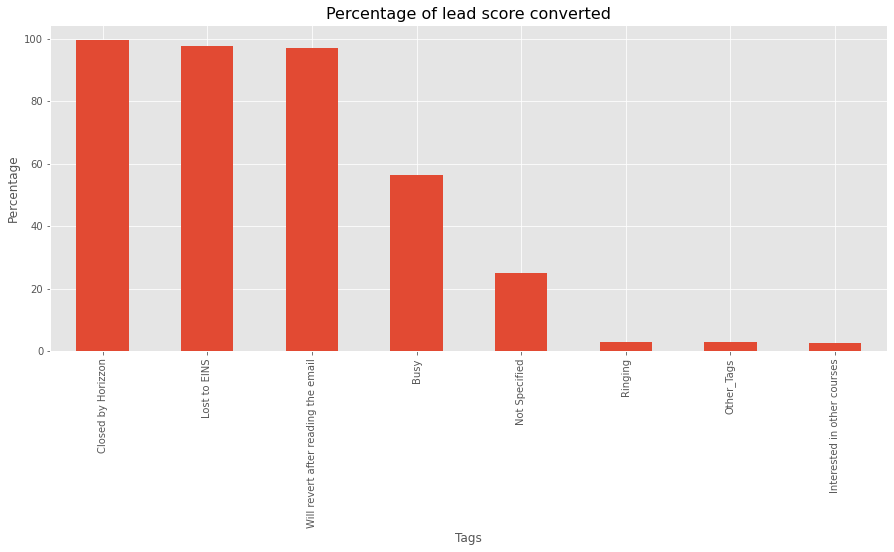

In [51]:
plt.figure( figsize = (15,6))
#plotting bar chart to visualize better
crosstab_df.iloc[1].sort_values(ascending = False).plot(kind = 'bar')

#Adding and formatting title and labels
plt.title('Percentage of lead score converted',fontsize = 16)
plt.xlabel('Tags')
plt.ylabel('Percentage')
plt.show()

**Inferences** :
- Leads having tag **Closed by Horizon, Lost to EINS and Will revent after reading the email** have higher conversion rate.


>>### **Lead Source**

In [52]:
#checking value counts of Lead Source column

ls['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
youtubechannel          1
NC_EDM                  1
WeLearn                 1
blog                    1
Name: Lead Source, dtype: int64

In [53]:
#replacing Nan Values and combining low frequency values
ls['Lead Source'] = ls['Lead Source'].replace(np.nan,'Others')
ls['Lead Source'] = ls['Lead Source'].replace('google','Google')
ls['Lead Source'] = ls['Lead Source'].replace('Facebook','Social Media')
ls['Lead Source'] = ls['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')                                                   

- **We can group some of the lower frequency occuring labels under a common label 'Others'**

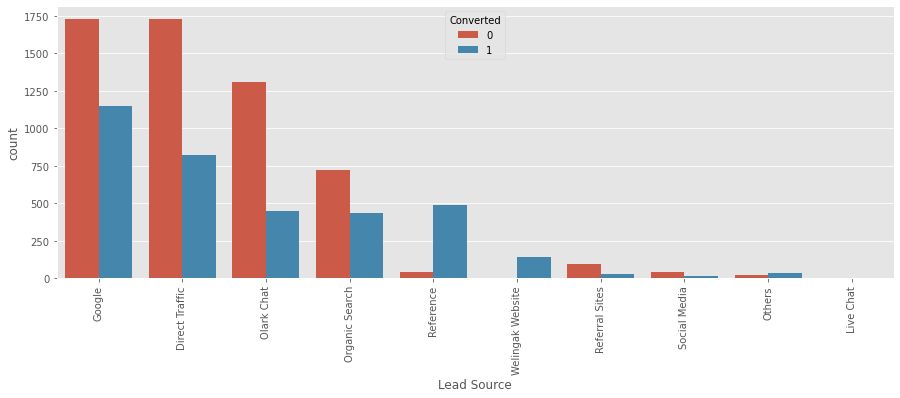

In [54]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(ls['Lead Source'], hue=ls.Converted, order = ls['Lead Source'].value_counts().index)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Inference
- Maximum number of leads are generated by Google and Direct traffic.
- Conversion Rate of **reference** lead source and lead source through **welingak website** is high.
- To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google lead sources and generate more lead sources from reference and welingak website.

>>### **Percentage of Lead Conversion** 

In [55]:
#Creating crosstab to find out percentage
crosstab_df = pd.crosstab(ls['Converted'],
                  ls['Lead Source']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

Lead Source,Direct Traffic,Google,Live Chat,Olark Chat,Organic Search,Others,Reference,Referral Sites,Social Media,Welingak Website
Converted,,,,,,,,,,
0,67.83,60.08,0.0,74.47,62.22,36.36,8.24,75.2,75.44,1.41
1,32.17,39.92,100.0,25.53,37.78,63.64,91.76,24.8,24.56,98.59


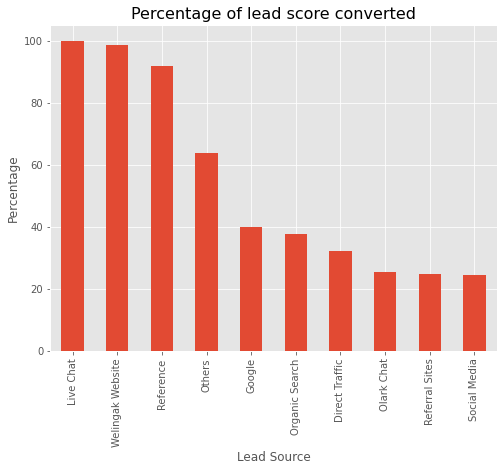

In [56]:
plt.figure( figsize = (8,6))
#plotting bar chart to visualize better
crosstab_df.iloc[1].sort_values(ascending = False).plot(kind = 'bar')

#Adding and formatting title and labels
plt.title('Percentage of lead score converted',fontsize = 16)
plt.xlabel('Lead Source')
plt.ylabel('Percentage')
plt.show()

**Inferences** :
- **Live Chat, Welingak Website , Referance** leads with this lead sources have high conversion rate. 
- Live chat have higher conversion rate though it have lowest frequency. 
- **Olark Chat, Referal Sites and Social Media** have lowest conversion rates as compared to others.

>>### **Last Activity**

In [57]:
# Check value counts for last activity column
ls['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [58]:
#replacing Nan Values and combining low frequency values

ls['Last Activity'] = ls['Last Activity'].replace(np.nan,'Others')
ls['Last Activity'] = ls['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [59]:
# Last Activity:

ls['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

>>### **Percentage of Lead Conversion** 

In [60]:
#Creating crosstab to find out percentage
crosstab_df = pd.crosstab(ls['Converted'],
                  ls['Last Activity']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

Last Activity,Converted to Lead,Email Bounced,Email Link Clicked,Email Opened,Form Submitted on Website,Olark Chat Conversation,Others,Page Visited on Website,SMS Sent
Converted,,,,,,,,,
0,87.38,92.02,72.66,63.54,75.86,91.37,46.43,76.41,37.09
1,12.62,7.98,27.34,36.46,24.14,8.63,53.57,23.59,62.91


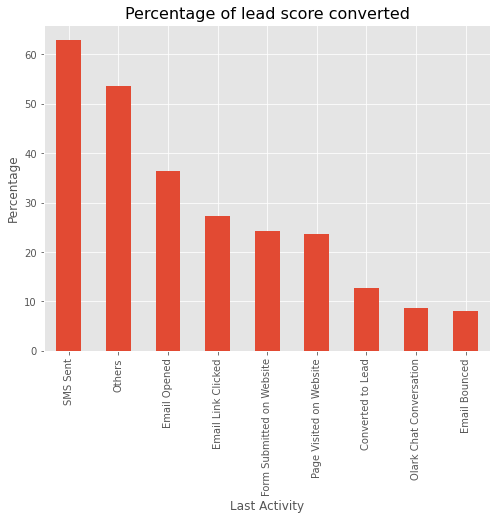

In [61]:
plt.figure( figsize = (8,6))
#plotting bar chart to visualize better
crosstab_df.iloc[1].sort_values(ascending = False).plot(kind = 'bar')

#Adding and formatting title and labels
plt.title('Percentage of lead score converted',fontsize = 16)
plt.xlabel('Last Activity')
plt.ylabel('Percentage')
plt.show()

**Inferences** :
- Leads seems to be converted when **SMS is sent**. 

In [62]:
#Check the Null Values in All Columns:
round(100*(ls.isnull().sum()/len(ls.index)), 2).sort_values(ascending = False)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Notable Activity                            0.00
A free copy of Mastering The Interview           0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
Total Time Spent on Website                      0.00
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [63]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
ls = ls.dropna()

In [64]:
#Checking percentage of Null Values in All Columns:
round(100*(ls.isnull().sum()/len(ls.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

>>### **Leads Origin**

In [65]:
#Lead Origin
ls['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

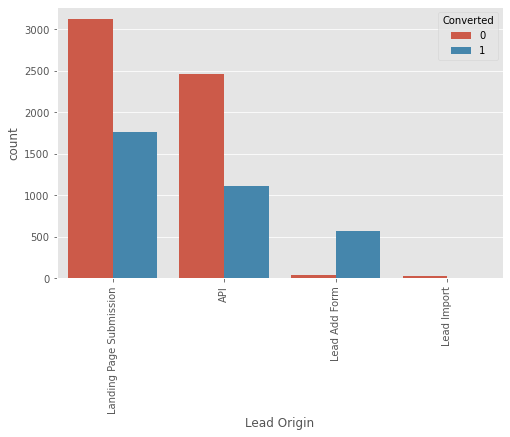

In [66]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(ls['Lead Origin'], hue=ls.Converted ,order = ls['Lead Origin'].value_counts().index )
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

**Inference**
- **API** and **Landing Page Submission** bring higher number of leads as well as conversion.
-**Lead Add** Form has a very high conversion rate but count of leads are not very high.
- **Lead Import**  Form get very few leads.
- In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

>>### **Percentage of Lead Conversion** 

In [67]:
#Creating crosstab to find out percentage
crosstab_df = pd.crosstab(ls['Converted'],
                  ls['Lead Origin']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

Lead Origin,API,Landing Page Submission,Lead Add Form,Lead Import
Converted,,,,
0,68.84,63.81,6.41,70.97
1,31.16,36.19,93.59,29.03


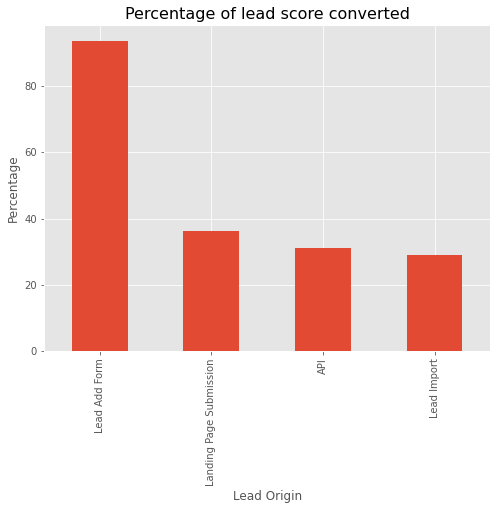

In [68]:
plt.figure( figsize = (8,6))
#plotting bar chart to visualize better
crosstab_df.iloc[1].sort_values(ascending = False).plot(kind = 'bar')

#Adding and formatting title and labels
plt.title('Percentage of lead score converted',fontsize = 16)
plt.xlabel('Lead Origin')
plt.ylabel('Percentage')
plt.show()

**Inferences** :
- Leads seems to be generated higher from **Lead Add form, API** as compared to others.

>>### **Do Not Email & Do Not Call**

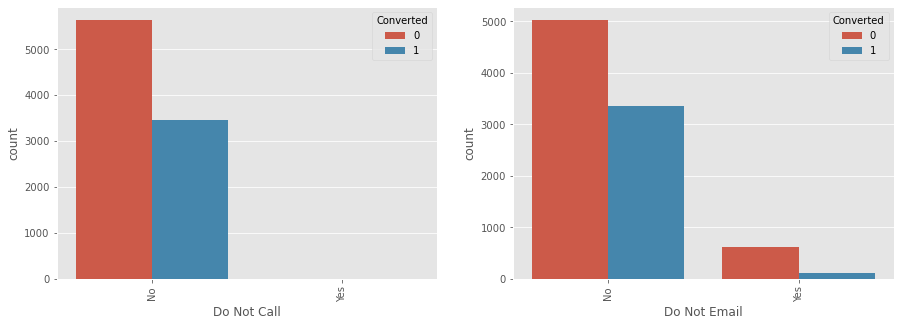

In [69]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(ls['Do Not Call'], hue=ls.Converted, order = ls['Do Not Call'].value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(ls['Do Not Email'], hue=ls.Converted, order = ls['Do Not Email'].value_counts().index)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [70]:
#checking value counts for Do Not Call
ls['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [71]:
#checking value counts for Do Not Email
ls['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

- We Can append the **Do Not Call** Column to the list of Columns to be Dropped since it is **highly imbalanced**.

In [72]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

>>### Search

In [73]:
ls.Search.value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

- We Can append the **Search** Column to the list of Columns to be Dropped since it is **highly imbalanced**.

>>### Magazine

In [74]:
ls.Magazine.value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

- We Can append the **Magazine** Column to the list of Columns to be Dropped since it has **only one value**.

>>### Newspaper Article

In [75]:
ls['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

- We Can append the **News Article** Column to the list of Columns to be Dropped since it is **highly imbalanced**.

>>### X Education Forums

In [76]:
ls['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

- We Can append the **X Education Forums** Column to the list of Columns to be Dropped since it is **highly imbalanced**.

>>### Newspaper

In [77]:
ls['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

- We Can append the **Newspaper** Column to the list of Columns to be Dropped since it is **highly imbalanced**.

>>### Digital Advertisement

In [78]:
ls['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

- We Can append the **Digital Advertisement** Column to the list of Columns to be Dropped since it is **highly imbalanced**.

>>### Through Recommendations

In [79]:
ls['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

- We Can append the **Through Recommendations** Column to the list of Columns to be Dropped since it is **highly imbalanced**.

>>### Receive More Updates About Our Courses

In [80]:
ls['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

- We Can append the **Receive More Updates About Our Courses** Column to the list of Columns to be Dropped since it has **only one value**.

>>### Update me on Supply Chain Content

In [81]:
ls['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

- We Can append the **Update me on Supply Chain Content** Column to the list of Columns to be Dropped since it has **only one value**.

>>### Get updates on DM Content

In [82]:
ls['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

- We Can append the **Get updates on DM Content** Column to the list of Columns to be Dropped since it has **only one value**.

>>### I agree to pay the amount through cheque

In [83]:
ls['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

- We Can append the **I agree to pay the amount through cheque** Column to the list of Columns to be Dropped since it has **only one value**.

>>### A free copy of Mastering The Interview

In [84]:
ls['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

**adding imbalanced columns to the list of columns to be dropped**

In [85]:
#adding imbalanced columns to the list of columns to be dropped

cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

>>### Last Notable Activity

In [86]:
#checking value counts of last Notable Activity
ls['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
Email Received                     1
Resubscribed to emails             1
View in browser link Clicked       1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64

In [87]:
#clubbing lower frequency values

ls['Last Notable Activity'] = ls['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

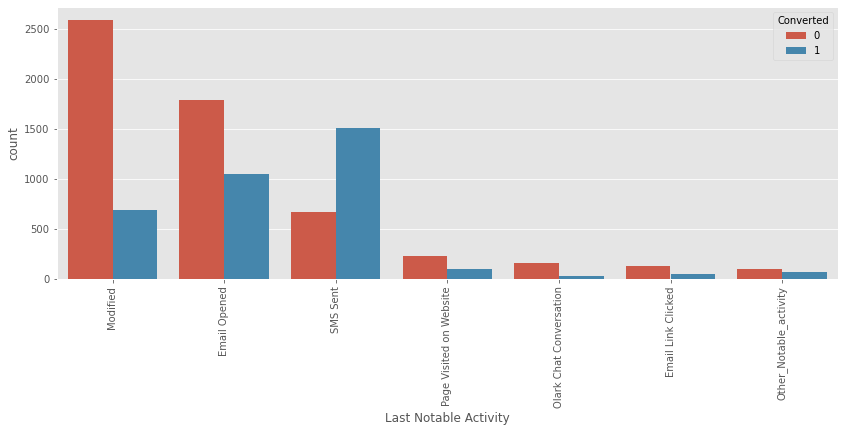

In [88]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = ls, order = ls["Last Notable Activity"].value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [89]:
#checking value counts for variable

ls['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [90]:
#Creating crosstab to find out percentage
crosstab_df = pd.crosstab(ls['Converted'],
                  ls['Last Notable Activity']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

Last Notable Activity,Email Link Clicked,Email Opened,Modified,Olark Chat Conversation,Other_Notable_activity,Page Visited on Website,SMS Sent
Converted,,,,,,,
0,73.99,63.07,79.11,86.34,60.62,70.75,30.57
1,26.01,36.93,20.89,13.66,39.38,29.25,69.43


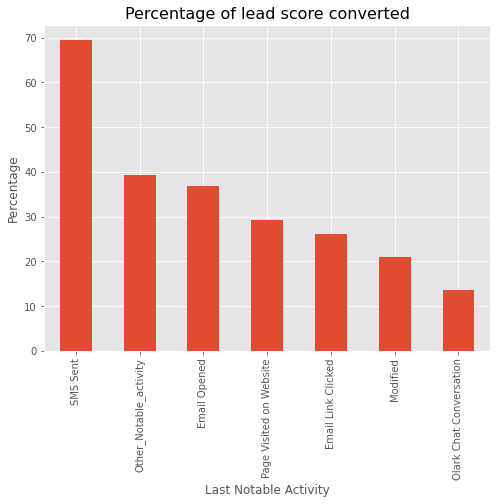

In [91]:
plt.figure( figsize = (8,6))
#plotting bar chart to visualize better
crosstab_df.iloc[1].sort_values(ascending = False).plot(kind = 'bar')

#Adding and formatting title and labels
plt.title('Percentage of lead score converted',fontsize = 16)
plt.xlabel('Last Notable Activity')
plt.ylabel('Percentage')
plt.show()

**Dropping highly Imbalanced columns**

In [92]:
#list of columns to be dropped
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [93]:
#dropping columns
ls = ls.drop(cols_to_drop,1)
ls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

## **Numerical Attributes Analysis:**

>>### Converted

In [94]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(ls['Converted'])/len(ls['Converted'].index))*100
Converted

38.02043282434362

- 38% leads converted to paying customers

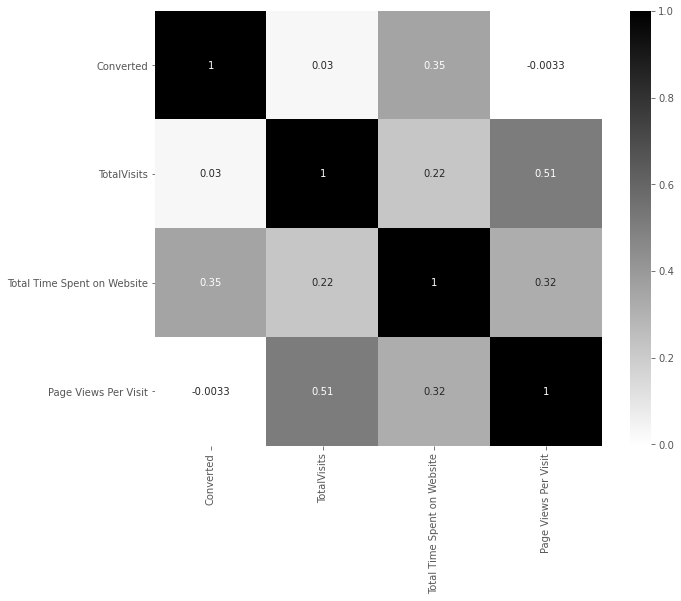

In [95]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(ls.corr(), cmap="binary", annot=True)
plt.show()

>>### Total Visits

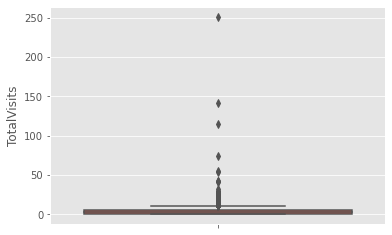

In [96]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=ls['TotalVisits'])
plt.show()

- We can see presence of **outliers** here

In [97]:
#checking percentile values for "Total Visits"

ls['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

#### **Outlier Treatment : TotalVisits**

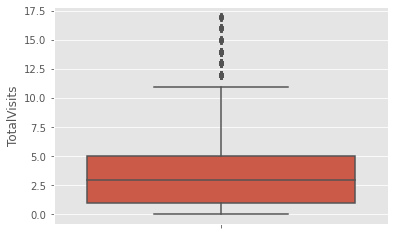

In [98]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = ls.TotalVisits.quantile(0.99)
ls = ls[(ls.TotalVisits <= Q3)]
Q1 = ls.TotalVisits.quantile(0.01)
ls = ls[(ls.TotalVisits >= Q1)]
sns.boxplot(y=ls['TotalVisits'])
plt.show()

In [99]:
ls.shape

(9020, 14)

>>### Total Time Spent on Website

In [100]:
#checking percentiles for "Total Time Spent on Website"

ls['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

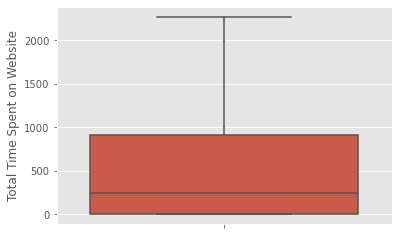

In [101]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=ls['Total Time Spent on Website'])
plt.show()

- Since there are no major Outliers for the above variable we don't do any Outlier Treatment for this above Column

>>### Check for Page Views Per Visit:

In [102]:
#checking spread of "Page Views Per Visit"

ls['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

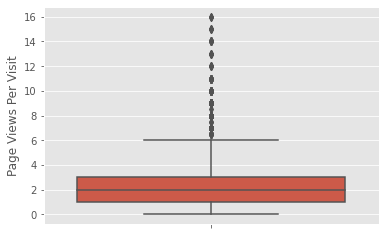

In [103]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=ls['Page Views Per Visit'])
plt.show()

>> Outlier Treatment : Page Views Per Visit

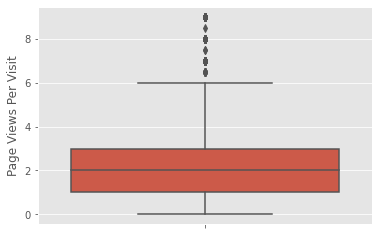

In [104]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = ls['Page Views Per Visit'].quantile(0.99)
ls = ls[ls['Page Views Per Visit'] <= Q3]
Q1 = ls['Page Views Per Visit'].quantile(0.01)
ls = ls[ls['Page Views Per Visit'] >= Q1]
sns.boxplot(y=ls['Page Views Per Visit'])
plt.show()

In [105]:
ls.shape

(8953, 14)

>>### Total Visits

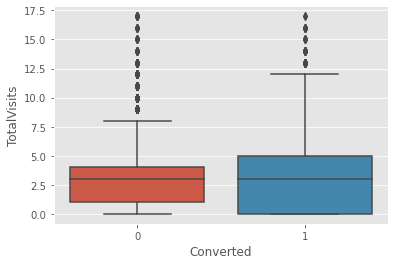

In [106]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = ls)
plt.show()

**Inference**
- Median for converted and not converted ls are the close.
- Nothng conclusive can be said on the basis of Total Visits

**Total Time Spent on Website Vs Converted variable**

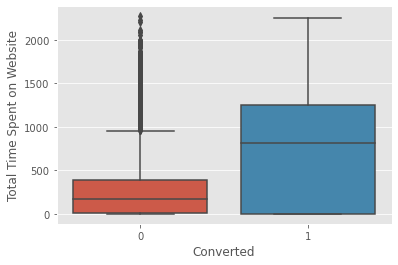

In [107]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=ls.Converted, y=ls['Total Time Spent on Website'])
plt.show()

**Inference**
- ls spending more time on the website are more likely to be converted.
- Website should be made more engaging to make ls spend more time.

**Page Views Per Visit vs Converted variable**

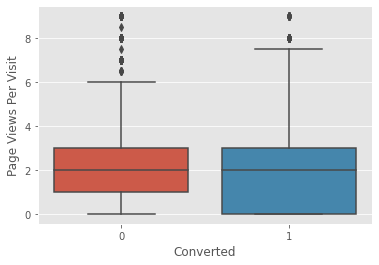

In [108]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=ls.Converted,y=ls['Page Views Per Visit'])
plt.show()

**Inference**
- Median for converted and unconverted ls is the same.
- Nothing can be said specifically for lead conversion from Page Views Per Visit

In [109]:
#checking missing values in leftover columns/

round(100*(ls.isnull().sum()/len(ls.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

 **There are no missing values in the columns to be analyzed further**

### **Dummy variable Creation**

In [110]:
#getting a list of categorical columns

cat_cols= ls.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [111]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
ls[varlist] = ls[varlist].apply(binary_map)

In [112]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(ls[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

ls = pd.concat([ls,dummy],1)

In [113]:
dummy = pd.get_dummies(ls['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
ls = pd.concat([ls, dummy], axis = 1)

In [114]:
dummy = pd.get_dummies(ls['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
ls = pd.concat([ls, dummy], axis = 1)

In [115]:
dummy = pd.get_dummies(ls['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
ls = pd.concat([ls, dummy], axis = 1)

In [116]:
dummy = pd.get_dummies(ls['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
ls = pd.concat([ls, dummy], axis = 1)

In [117]:
dummy = pd.get_dummies(ls['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
ls = pd.concat([ls, dummy], axis = 1)

In [118]:
#dropping the original columns after dummy variable creation

ls.drop(cat_cols,1,inplace = True)

# **MODEL BUILDING**

In [119]:
#Importing library to split the data
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = ls['Converted']

y.head()

X=ls.drop('Converted', axis=1)

In [120]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [121]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   What is your current occupation_Housewife             6267 non-null   uint8  
 7   What is your current occupation_Other                 6267 non-null   uint8  
 8   What is your current occupation_Student               6

## **Scaling of Data:**

In [122]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler # importing library for scaling

# instantiating object
scaler = StandardScaler()  

# creating list containing numerical columns
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

# fit and transform the data
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


## **Model Building using Stats Model & RFE:**

In [123]:
import statsmodels.api as sm #importing statsmodels library for modelling

In [124]:
from sklearn.linear_model import LogisticRegression #importing logistic regression library

logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [125]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True])

In [126]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('What is your current occupation_Housewife', False, 28),
 ('What is your current occupation_Other', False, 32),
 ('What is your current occupation_Student', False, 22),
 ('What is your current occupation_Unemployed', False, 20),
 ('What is your current occupation_Working Professional', False, 8),
 ('City_Other Cities', False, 36),
 ('City_Other Cities of Maharashtra', False, 33),
 ('City_Other Metro Cities', False, 39),
 ('City_Thane & Outskirts', False, 38),
 ('City_Tier II Cities', False, 30),
 ('Specialization_Banking, Investment And Insurance', False, 14),
 ('Specialization_Business Administration', False, 37),
 ('Specialization_E-Business', False, 34),
 ('Specialization_E-COMMERCE', False, 21),
 ('Specialization_International Business', F

In [127]:
#Creating a list for RFE selected col
col = X_train.columns[rfe.support_]
list(col)


['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Lead Source_Direct Traffic',
 'Lead Source_Referral Sites',
 'Lead Source_Welingak Website',
 'Last Activity_SMS Sent',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation',
 'Last Notable Activity_SMS Sent',
 'Tags_Closed by Horizzon',
 'Tags_Interested in other courses',
 'Tags_Lost to EINS',
 'Tags_Other_Tags',
 'Tags_Ringing',
 'Tags_Will revert after reading the email']

In [128]:
#Columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Sourc

## **Model 1**

In [129]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])  # adding constant
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()) #Running the model
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.7
Date:                Sun, 16 May 2021   Deviance:                       2509.3
Time:                        19:36:19   Pearson chi2:                 8.34e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1899      0.088    -13.480      0.000      -1.363      -1.017
Total Time Spent on Website                       0.8970      0.053     16.999      0.000       0.794       1.000
Lead Origin_Lead Add Form                         1.6712      0.450      3.714      0.000       0.789       2.553
Lead Source_Direct Traffic                       -0.8320      0.129     -6.471      0.000      -1.084      -0.580
Lead Source_Referral Sites                       -0.5284      0.465     -1.138      0.255      -1.439       0.382
Lead Source_Welingak Website                      3.9043      1.110      3.518      0.000       1.729       6.079
Last Activity_SMS Sent                            1.2373      0.223      5.555      0.000       0.801       1.674
Last Notable Activity_Modified                   -1.2839      0.150     -8.532      0.000      -1.579      -0.989
Last Notable Activity_Olark Chat Conversation    -1.7123      0.490     -3.496      0.000      -2.672      -0.752
Last Notable Activity_SMS Sent                    1.0151      0.257      3.943      0.000       0.511       1.520
Tags_Closed by Horizzon                           6.9834      1.019      6.853      0.000       4.986       8.981
Tags_Interested in other courses                 -2.1641      0.407     -5.321      0.000      -2.961      -1.367
Tags_Lost to EINS                                 5.7302      0.608      9.419      0.000       4.538       6.923
Tags_Other_Tags                                  -2.4417      0.210    -11.633      0.000      -2.853      -2.030
Tags_Ringing                                     -3.5858      0.243    -14.752      0.000      -4.062      -3.109
Tags_Will revert after reading the email          4.4263      0.185     23.989      0.000       4.065       4.788
=================================================================================================================
"""

- p-value of variable **Lead Source_Referral Sites** is high, so we can drop it.

In [130]:
#dropping column with high p-value

col = col.drop('Lead Source_Referral Sites',1)

## **Model 2**

In [131]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])     # adding constant
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()) #Running the model
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1255.3
Date:                Sun, 16 May 2021   Deviance:                       2510.7
Time:                        19:36:19   Pearson chi2:                 8.34e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2029      0.088    -13.729      0.000      -1.375      -1.031
Total Time Spent on Website                       0.8963      0.053     16.979      0.000       0.793       1.000
Lead Origin_Lead Add Form                         1.6795      0.450      3.735      0.000       0.798       2.561
Lead Source_Direct Traffic                       -0.8224      0.128     -6.409      0.000      -1.074      -0.571
Lead Source_Welingak Website                      3.9060      1.110      3.520      0.000       1.731       6.081
Last Activity_SMS Sent                            1.2437      0.223      5.584      0.000       0.807       1.680
Last Notable Activity_Modified                   -1.2791      0.150     -8.501      0.000      -1.574      -0.984
Last Notable Activity_Olark Chat Conversation    -1.7079      0.489     -3.491      0.000      -2.667      -0.749
Last Notable Activity_SMS Sent                    1.0150      0.257      3.943      0.000       0.510       1.520
Tags_Closed by Horizzon                           6.9868      1.019      6.857      0.000       4.990       8.984
Tags_Interested in other courses                 -2.2028      0.409     -5.391      0.000      -3.004      -1.402
Tags_Lost to EINS                                 5.7337      0.608      9.426      0.000       4.541       6.926
Tags_Other_Tags                                  -2.4401      0.210    -11.625      0.000      -2.852      -2.029
Tags_Ringing                                     -3.5818      0.243    -14.740      0.000      -4.058      -3.106
Tags_Will revert after reading the email          4.4234      0.184     23.993      0.000       4.062       4.785
=================================================================================================================
"""

- Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [132]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor #importing library for VIF

In [133]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Notable Activity_SMS Sent,6.22
4,Last Activity_SMS Sent,6.12
1,Lead Origin_Lead Add Form,1.82
5,Last Notable Activity_Modified,1.69
13,Tags_Will revert after reading the email,1.61
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
11,Tags_Other_Tags,1.26
0,Total Time Spent on Website,1.22
8,Tags_Closed by Horizzon,1.21


- There is a high correlation between two variables so we drop the variable with the higher valued VIF value

In [134]:
#dropping variable with high VIF

col = col.drop('Last Notable Activity_SMS Sent',1)

## **Model 3**

In [135]:
#BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[col]) #Adding constant
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())   # Running the model
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1263.3
Date:                Sun, 16 May 2021   Deviance:                       2526.6
Time:                        19:36:20   Pearson chi2:                 8.51e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1179      0.084    -13.382      0.000      -1.282      -0.954
Total Time Spent on Website                       0.8896      0.053     16.907      0.000       0.786       0.993
Lead Origin_Lead Add Form                         1.6630      0.455      3.657      0.000       0.772       2.554
Lead Source_Direct Traffic                       -0.8212      0.127     -6.471      0.000      -1.070      -0.572
Lead Source_Welingak Website                      3.8845      1.114      3.488      0.000       1.701       6.068
Last Activity_SMS Sent                            1.9981      0.113     17.718      0.000       1.777       2.219
Last Notable Activity_Modified                   -1.6525      0.124    -13.279      0.000      -1.896      -1.409
Last Notable Activity_Olark Chat Conversation    -1.8023      0.491     -3.669      0.000      -2.765      -0.839
Tags_Closed by Horizzon                           7.1955      1.020      7.053      0.000       5.196       9.195
Tags_Interested in other courses                 -2.1318      0.406     -5.253      0.000      -2.927      -1.336
Tags_Lost to EINS                                 5.9177      0.611      9.689      0.000       4.721       7.115
Tags_Other_Tags                                  -2.3737      0.206    -11.507      0.000      -2.778      -1.969
Tags_Ringing                                     -3.4531      0.238    -14.532      0.000      -3.919      -2.987
Tags_Will revert after reading the email          4.5070      0.188     24.002      0.000       4.139       4.875
=================================================================================================================
"""

In [136]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.82
12,Tags_Will revert after reading the email,1.56
4,Last Activity_SMS Sent,1.46
5,Last Notable Activity_Modified,1.40
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
10,Tags_Other_Tags,1.25
0,Total Time Spent on Website,1.22
7,Tags_Closed by Horizzon,1.21
11,Tags_Ringing,1.16


- So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

## **Predictions on Train Data**

In [137]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.283149
4696    0.031440
3274    0.576636
2164    0.006433
1667    0.989105
7024    0.130813
8018    0.024219
778     0.205594
6942    0.002678
4440    0.096716
dtype: float64

In [138]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28314859, 0.0314396 , 0.57663553, 0.00643284, 0.98910464,
       0.13081306, 0.02421913, 0.20559401, 0.00267787, 0.09671623])

In [139]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.283149,9196
1,0,0.031440,4696
2,0,0.576636,3274
3,0,0.006433,2164
4,1,0.989105,1667


In [140]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.283149,9196,0
1,0,0.031440,4696,0
2,0,0.576636,3274,1
3,0,0.006433,2164,0
4,1,0.989105,1667,1


>> ### Model Evaluation

In [141]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3693  189]
 [ 281 2104]]


In [142]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9250039891495133


In [143]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [144]:
# Let's see the sensitivity of our logistic regression model
print( 'Sensitivity : ',TP / float(TP+FN) )

Sensitivity :  0.8821802935010482


In [145]:
# Let us calculate specificity
print( 'Specificity : ',TN / float(TN+FP) )

Specificity :  0.9513137557959814


In [146]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print('False Postive Rate :', FP/ float(TN+FP))

False Postive Rate : 0.04868624420401855


In [147]:
# positive predictive value (Precision)
print ('Precision :',TP / float(TP+FP))

Precision : 0.9175752289576974


In [148]:
# Negative predictive value
print ('Negative predictive value :',TN / float(TN+ FN))

Negative predictive value : 0.9292903875188727


# **PLOTTING ROC CURVE**

In [149]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - Specificity]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [150]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

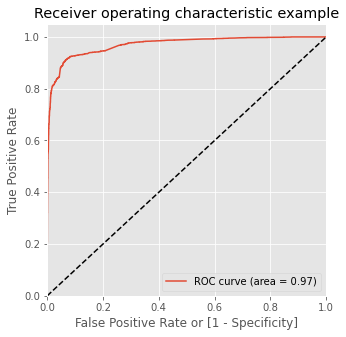

In [151]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

**Inference**

The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model.

# **OPTIMAL CUTOFF**

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that: 

In [152]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.283149,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.031440,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.576636,3274,1,1,1,1,1,1,1,0,0,0,0
3,0,0.006433,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.989105,1667,1,1,1,1,1,1,1,1,1,1,1


In [153]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.816180  0.971488  0.720762
0.2   0.2  0.901069  0.931237  0.882535
0.3   0.3  0.922930  0.916981  0.926584
0.4   0.4  0.925802  0.901468  0.940752
0.5   0.5  0.925004  0.882180  0.951314
0.6   0.6  0.915909  0.828092  0.969861
0.7   0.7  0.916228  0.810063  0.981453
0.8   0.8  0.906335  0.774843  0.987120
0.9   0.9  0.887027  0.718239  0.990726


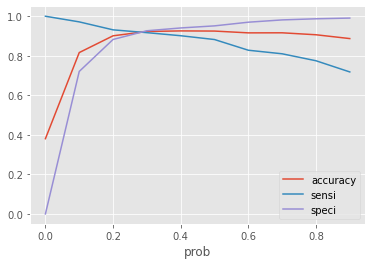

In [154]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**Inference** 


*   From the curve above, **`0.3`** is the optimum point to take it as a cutoff probability.




# **PREDICTIONS ON TRAIN SET**

#### **Accuracy**

In [155]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.283149,9196,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.031440,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.576636,3274,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.006433,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.989105,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [156]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.283149,9196,0,28
1,0,0.031440,4696,0,3
2,0,0.576636,3274,1,58
3,0,0.006433,2164,0,1
4,1,0.989105,1667,1,99


In [157]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.922929631402585

#### **Confusion Matrix**

In [158]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3597,  285],
       [ 198, 2187]], dtype=int64)

In [159]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [160]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity :',TP / float(TP+FN) )

Sensitivity : 0.9169811320754717


In [161]:
# Let us calculate specificity
print('Specificity:',TN / float(TN+FP))

Specificity: 0.9265842349304482


## **Observation**:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:
- Accuracy : 92.29%
- Sensitivity : 91.70%
- Specificity : 92.66%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall. 

In [162]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print('False Postive Rate :',FP/ float(TN+FP))

False Postive Rate : 0.07341576506955177


In [163]:
# Positive predictive value (Precision)
print ('Precision :',TP / float(TP+FP))

Precision : 0.8847087378640777


In [164]:
# Negative predictive value
print ('Negative predictive value :',TN / float(TN+ FN))

Negative predictive value : 0.9478260869565217


In [165]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3597,  285],
       [ 198, 2187]], dtype=int64)

In [166]:
#importing libraries required to find precision and recall
from sklearn.metrics import precision_score, recall_score

In [167]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted) #precision

0.8847087378640777

In [168]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted) #recall

0.9169811320754717

In [169]:
from sklearn.metrics import precision_recall_curve #library for precision recall curve

In [170]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

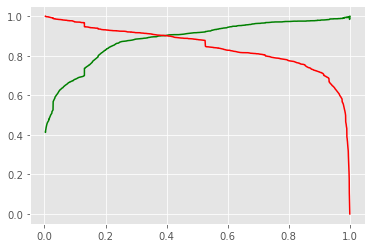

In [171]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [172]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,0.575687,-0.311318,0.092860,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
984,-0.090676,-0.550262,0.356568,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
8135,-0.423857,0.812462,-0.170849,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
6915,0.242505,-0.628665,-0.170849,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2712,-0.090676,-0.421456,0.356568,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [173]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,-0.311318,0,1,0,1,0,0,0,0,0,0,1,0
984,-0.550262,0,0,0,1,1,0,0,0,0,1,0,0
8135,0.812462,0,1,0,1,0,0,0,0,0,0,0,0
6915,-0.628665,0,0,0,0,0,0,0,0,0,0,1,0
2712,-0.421456,0,0,0,0,0,0,0,0,0,0,0,1


In [174]:
X_test_sm = sm.add_constant(X_test) #add constant

# **PREDICTIONS ON TEST SET**

In [175]:
y_test_pred = res.predict(X_test_sm) #adding constant

In [176]:
y_test_pred[:10]

7681    0.024819
984     0.025692
8135    0.686054
6915    0.005880
2712    0.953208
244     0.002398
4698    0.014697
8287    0.027549
6791    0.981608
8970    0.005703
dtype: float64

In [177]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [178]:
# Let's see the head
y_pred_1.head()

,0
7681,0.024819
984,0.025692
8135,0.686054
6915,0.005880
2712,0.953208


In [179]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [180]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [181]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [182]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [183]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.024819
1,0,984,0.025692
2,0,8135,0.686054
3,0,6915,0.005880
4,1,2712,0.953208


In [184]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [185]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.024819
1,0,984,0.025692
2,0,8135,0.686054
3,0,6915,0.005880
4,1,2712,0.953208


In [186]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [187]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.024819,2
1,984,0,0.025692,3
2,8135,0,0.686054,69
3,6915,0,0.005880,1
4,2712,1,0.953208,95


In [188]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [189]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.024819,2,0
1,984,0,0.025692,3,0
2,8135,0,0.686054,69,1
3,6915,0,0.005880,1,0
4,2712,1,0.953208,95,1


#### **Accuracy**

In [190]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9277736411020104

- **Accuracy : 92.77**

#### **Confusion Matrix**

In [191]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1563,  113],
       [  81,  929]], dtype=int64)

In [192]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [193]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :", TP / float(TP+FN))

Sensitivity : 0.9198019801980198


In [194]:
# Let us calculate specificity
print('Specificity :',TN / float(TN+FP))

Specificity : 0.9325775656324582


In [195]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8915547024952015

In [196]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9198019801980198

## **Observation**:
After running the model on the Test Data these are the figures we obtain:
- Accuracy : 92.78%
- Sensitivity : 91.98%
- Specificity : 93.26%

# **FINAL OBSERVATION**

Let us compare the values obtained for Train & Test:

### <u> Train Data: </u>
- Accuracy : 92.29%
- Sensitivity : 91.70%
- Specificity : 92.66%

### <u> Test Data: </u>
- Accuracy : 92.78%
- Sensitivity : 91.98%
- Specificity : 93.26%

**The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model**

# Conversion Rates 

### Before modeling

In [197]:
#Checking the Converted Rate
Converted_Rate = (sum(ls['Converted'])/len(ls['Converted'].index))*100
Converted_Rate

37.92025019546521

**We can see that conversion rate before modelling is found to be around 37.92%**



In [198]:
#Preparing the dataframe - to scale the variables and prepare the complete data.
X[num_cols] = scaler.transform(X[num_cols])

In [199]:
X=X[col]
X.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,-0.891876,0,0,0,0,1,0,0,1,0,0,0,0
1,0.366310,0,0,0,0,0,0,0,0,0,0,1,0
2,1.967978,0,1,0,0,0,0,0,0,0,0,0,1
3,-0.322519,0,1,0,0,1,0,0,0,0,0,1,0
4,1.773836,0,0,0,0,1,0,0,0,0,0,0,1


In [200]:
#Adding a constant to the dataframe
X_sm = sm.add_constant(X)

In [201]:
#Predicting the y-values on X dataframe (Leads.csv)
y_ans_pred = res.predict(X_sm)

In [202]:
#Printing the probabilities
y_ans_pred[:10]

0    0.003349
1    0.014131
2    0.986855
3    0.000654
4    0.964920
5    0.027549
6    0.975070
7    0.027549
8    0.068205
9    0.140035
dtype: float64

In [203]:
# Converting y_pred to a dataframe which is an array
y_ans_pred_df = pd.DataFrame(y_ans_pred)

In [204]:
# Converting y to dataframe
y_df = pd.DataFrame(y)

In [205]:
# Putting Lead_Number to index
y_df['Lead_Number'] = lead_copy['Lead Number']

In [206]:
# Removing index for both dataframes to append them side by side 
y_ans_pred_df.reset_index(drop=True, inplace=True)
y_df.reset_index(drop=True, inplace=True)

In [207]:
# Appending y_test_df and y_df
y_ans_final = pd.concat([y_df, y_ans_pred_df],axis=1)

In [208]:
# Renaming the column 
y_ans_final= y_ans_final.rename(columns={ 0 : 'Conversion_Prob'})

In [209]:
#Displaying the Answer_Dataframe
y_ans_final.head()

,Converted,Lead_Number,Conversion_Prob
0,0,660737,0.003349
1,0,660728,0.014131
2,1,660727,0.986855
3,0,660719,0.000654
4,1,660681,0.964920


**Finding the converted value using the probability cut - off = 0.3**

In [210]:
#Finding the Predicted values using the probability cut off
y_ans_final['final_predicted'] = y_ans_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [211]:
#Appending the score to the dataframe.
y_ans_final['Score'] = round(y_ans_final['Conversion_Prob'] * 100, 2)

In [212]:
#Displaying the predicted conversion on the final values
y_ans_final.head()

,Converted,Lead_Number,Conversion_Prob,final_predicted,Score
0,0,660737,0.003349,0,0.33
1,0,660728,0.014131,0,1.41
2,1,660727,0.986855,1,98.69
3,0,660719,0.000654,0,0.07
4,1,660681,0.964920,1,96.49


## Confusion Matrix - Complete Dataframe

In [213]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_ans_final.Converted, y_ans_final.final_predicted)

0.9239361108008489

In [214]:
#Confusion Matrix
confusionAns= metrics.confusion_matrix(y_ans_final.Converted, y_ans_final.final_predicted)
confusionAns

array([[5156,  402],
       [ 279, 3116]], dtype=int64)

In [215]:
#Confusion Matrix - Parameters
TP = confusionAns[1,1] # true positive 
TN = confusionAns[0,0] # true negatives
FP = confusionAns[0,1] # false positives
FN = confusionAns[1,0] # false negatives

In [216]:
# Let's see the sensitivity of our logistic regression model
sensitivity = round(TP / float(TP+FN),2) *100 
print(sensitivity)

92.0


In [217]:
# Let us calculate specificity
TN / float(TN+FP)

0.9276718243972653

## TOP LEADS

In [218]:
#Sorting values to find the top leads. 
ResultDf = y_ans_final.sort_values(by='Score', ascending=False)

In [219]:
#Displaying the top leads
ResultDf.head()

,Converted,Lead_Number,Conversion_Prob,final_predicted,Score
7854,1,587853,0.999962,1,100.0
3598,1,624348,0.999986,1,100.0
3920,1,621078,0.999994,1,100.0
2387,1,635776,0.999961,1,100.0
3981,1,620454,0.999953,1,100.0


In [220]:
FilteredResult = ResultDf.loc[ResultDf['Score'] >= 30]

In [221]:
print(ResultDf.shape)
print(FilteredResult.shape)

(8953, 5)
(3518, 5)


In [222]:
FilteredResult.head()

,Converted,Lead_Number,Conversion_Prob,final_predicted,Score
7854,1,587853,0.999962,1,100.0
3598,1,624348,0.999986,1,100.0
3920,1,621078,0.999994,1,100.0
2387,1,635776,0.999961,1,100.0
3981,1,620454,0.999953,1,100.0


In [223]:
#Checking the Converted Rate
Converted_Rate_AfterModelling= (sum(FilteredResult['Converted'])/len(FilteredResult['Converted'].index))*100
Converted_Rate_AfterModelling

88.5730528709494

**We provide a list of only 3500 who have the chances of getting converted into a potential lead so it is easier for the company to limit their target. When we check for conversion rate, it is found to be around 88%.**

#  HOT LEADS 

In [224]:
HotLeads = ResultDf.loc[ResultDf['Score'] >= 95]

In [225]:
#Checking the Converted Rate
Converted_Rate_ForHotLeads= HotLeads.Converted.value_counts(normalize = True)[1]
Converted_Rate_ForHotLeads

0.9864925709140027

In [226]:
HotLeads.shape

(2221, 5)

**We provide a list of only 2000 who are mostly getting converted to a lead, so it is easier for the company to limit their target. When we check for conversion rate, it is found to be around 98%. This list aims to target the top 10% of the customers.**